In [1]:
from functools import partial

import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import square
from superfv.tools.norms import linf_norm

In [2]:
ic = partial(square, bounds=(1, 2), vx=1, P=1)
N = 64
p = 3
T = 1

In [3]:
sim1 = EulerSolver(ic=ic, nx=N, p=p)
sim1.run(T)

Step #179 @ t=1.00e+00 | dt=2.43e-03 | min(rho)=9.26e-01, min(P)=1.00e+00 | E_cons=2.84e-14 | (ran in 0.33s)


In [4]:
sim2 = EulerSolver(ic=ic, nx=N, p=p, cupy=True)
sim2.run(T)

Step #179 @ t=1.00e+00 | dt=2.43e-03 | min(rho)=9.26e-01, min(P)=1.00e+00 | E_cons=0.00e+00 | (ran in 4.18s)


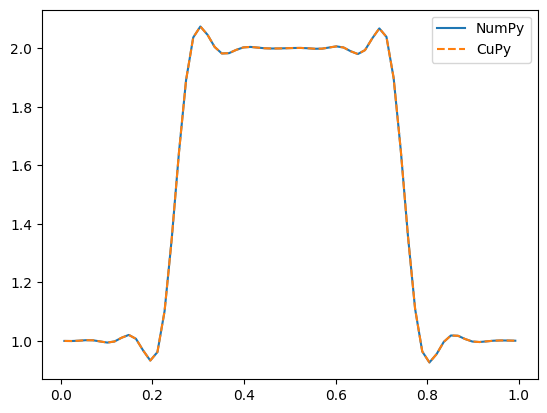

In [5]:
fig, ax = plt.subplots()

plot_1d_slice(sim1, ax, "rho", cell_averaged=True, label="NumPy")
plot_1d_slice(sim2, ax, "rho", cell_averaged=True, label="CuPy", linestyle="--")

ax.legend()

In [6]:
print(f"Error: {linf_norm(sim2.snapshots[-1]["u"] - sim1.snapshots[-1]["u"])}")

Error: 6.217248937900877e-15
